In [1]:
import pandas as pd
import re

In [ ]:
path = "googleplaystore_user_reviews.csv"
cleaned_review = pd.read_csv(path)
cleaned_review

In [3]:
cleaned_review.dropna(inplace=True)

In [4]:
cleaned_review.drop("Translated_Review", axis=1, inplace=True)

In [ ]:
cleaned_review.head(5)

In [ ]:
mode_sentiment = cleaned_review.groupby('App')['Sentiment'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
mode_sentiment

In [ ]:
mean_sent_polarity = cleaned_review.groupby('App').agg({ 'Sentiment_Polarity': 'mean',   'Sentiment_Subjectivity': 'mean'}).reset_index()
mean_sent_polarity 

In [ ]:
df_2 = pd.merge(mode_sentiment, mean_sent_polarity, on="App",how="outer")
df_2

df_2.to_csv('/Users/aruzhanakbayeva/Desktop/Ironhack/4.Project/df_2.csv', index=False)

In [ ]:
path = "cleaned_file.csv"
main = pd.read_csv(path)
main

In [11]:
main.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
main["Installs"] = main["Installs"].str.replace('+','')

In [13]:
main["Installs"] = main["Installs"].str.replace(',', '')

In [14]:
main["Installs"] = main["Installs"].str.replace('Free', '0')

In [15]:
main["Installs"] = main["Installs"].astype(int)

In [16]:
new_main = main[main["Installs"]>= 10000000]
new_main

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,10000000,Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24M,10000000,Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083,6.3M,10000000,Free,0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4.4M,10000000,Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
10781,Modern Strike Online,GAME,4.3,834117,44M,10000000,Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
10784,Big Hunter,GAME,4.3,245455,84M,10000000,Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [17]:
df_1 = new_main

In [85]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4,44829,20M,10000000,Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,5,224399,31M,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
42,Textgram - write on photos,ART_AND_DESIGN,4,295221,Varies with device,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,5,174531,24M,10000000,Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4,332083,6.3M,10000000,Free,0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up
10740,PhotoFunia,PHOTOGRAPHY,4,316378,4.4M,10000000,Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
10781,Modern Strike Online,GAME,4,834117,44M,10000000,Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
10784,Big Hunter,GAME,4,245455,84M,10000000,Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [19]:
df_1.to_csv('/Users/aruzhanakbayeva/Desktop/Ironhack/4.Project/clean_review.csv', index=False)

In [20]:
path = "category_installs.csv"
cat_inst = pd.read_csv(path)
cat_inst

,Category,Total_installs
0,GAME,34340000000
1,COMMUNICATION,32470000000
2,PRODUCTIVITY,13990000000
3,SOCIAL,13890000000
4,TOOLS,11120000000
5,PHOTOGRAPHY,9870000000
6,FAMILY,9260000000
7,NEWS_AND_MAGAZINES,7350000000
8,TRAVEL_AND_LOCAL,6650000000
9,VIDEO_PLAYERS,6150000000


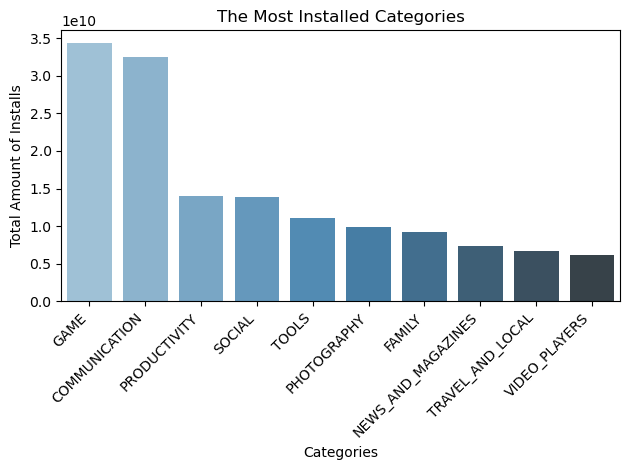

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Category', y='Total_installs', data=cat_inst, palette='Blues_d')

plt.xlabel('Categories')
plt.ylabel('Total Amount of Installs')
plt.title('The Most Installed Categories')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [22]:
df = pd.read_csv("top 10 apps.csv")
df

,App,total_installs
0,Subway Surfers,6000000000
1,Instagram,4000000000
2,Google Drive,4000000000
3,Google News,4000000000
4,Google Photos,4000000000
5,Hangouts,4000000000
6,Candy Crush Saga,3500000000
7,Temple Run 2,3000000000
8,Google Chrome: Fast & Secure,3000000000
9,Skype - free IM & video calls,3000000000


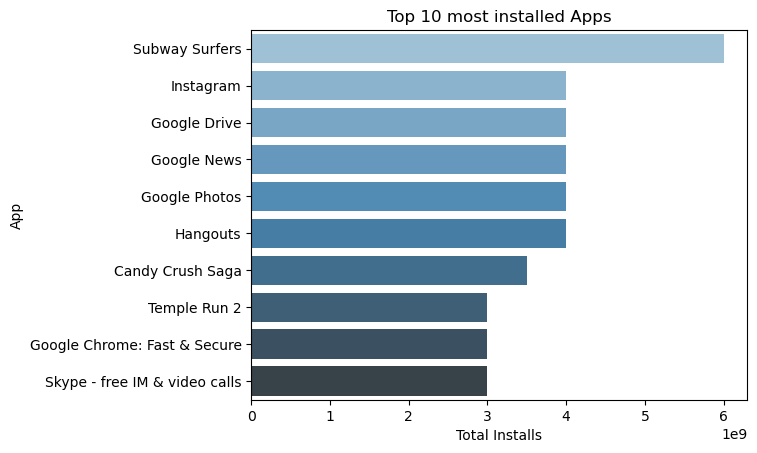

In [23]:
sns.barplot(x='total_installs', y='App', data=df, palette='Blues_d')

plt.xlabel('Total Installs')
plt.ylabel('App')
plt.title('Top 10 most installed Apps')
plt.xscale('linear')
plt.show()

In [89]:
df_1a=pd.read_csv("df_1.csv")
df_2a=pd.read_csv("df_2.csv")


In [91]:
# Perform outer join
merged_df = pd.merge(df_1a, df_2a, on='App', how='inner')

# Display the merged DataFrame
merged_df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,5,174531,24M,10000000,Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,Positive,0,1
1,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4,271920,16M,10000000,Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,Positive,0,1
2,Beauty Camera - Selfie Camera,BEAUTY,4,113715,Varies with device,10000000,Free,0,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device,Positive,0,0
3,Amazon Kindle,BOOKS_AND_REFERENCE,4,814080,Varies with device,100000000,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device,Positive,0,0
4,Amazon Kindle,BOOKS_AND_REFERENCE,4,814151,Varies with device,100000000,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device,Positive,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Bad Piggies,FAMILY,4,1168959,66M,50000000,Free,0,Everyone,Puzzle,"May 3, 2017",2.3.3,4.1 and up,Negative,0,1
523,Dumb Ways to Die 2: The Games,FAMILY,4,1671658,Varies with device,50000000,Free,0,Teen,Casual,"July 12, 2018",Varies with device,Varies with device,Positive,0,0
524,AppLock,TOOLS,4,4931562,Varies with device,100000000,Free,0,Everyone,Tools,"June 11, 2018",Varies with device,Varies with device,Negative,0,0
525,Avakin Life - 3D virtual world,FAMILY,4,1275373,91M,10000000,Free,0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,Positive,0,1


In [93]:
merged_df[['Category','Reviews']].sort_values(by=['Reviews'], ascending=False).head(12)

#df.sort_values(by=['col1'])

,Category,Reviews
290,SOCIAL,78158306
291,SOCIAL,78128208
149,GAME,44893888
148,GAME,44891723
147,GAME,44891723
150,FAMILY,44881447
132,GAME,23136735
131,GAME,23134775
130,GAME,23133508
133,FAMILY,23125280


In [96]:
 merged_df[['Category', 'Reviews']].groupby('Category').sum('Reviews').sort_values(by=['Reviews'], ascending=False).head(12)

,Reviews
Category,
GAME,722151242
SOCIAL,201988251
FAMILY,158694992
PHOTOGRAPHY,100452572
TOOLS,80792195
COMMUNICATION,79885520
SHOPPING,45149481
PERSONALIZATION,31159946
SPORTS,29201694


In [98]:
pd.options.display.float_format = '{:,.0f}'.format
grouped_df = merged_df[['Category', 'Reviews']].groupby('Category').mean().sort_values(by=['Reviews'], ascending=False)
grouped_df

,Reviews
Category,
SOCIAL,"11,881,662"
GAME,"5,309,936"
EDUCATION,"5,072,301"
FAMILY,"3,306,146"
PHOTOGRAPHY,"2,643,489"
COMMUNICATION,"2,282,443"
SPORTS,"2,246,284"
TOOLS,"2,071,595"
SHOPPING,"1,736,518"


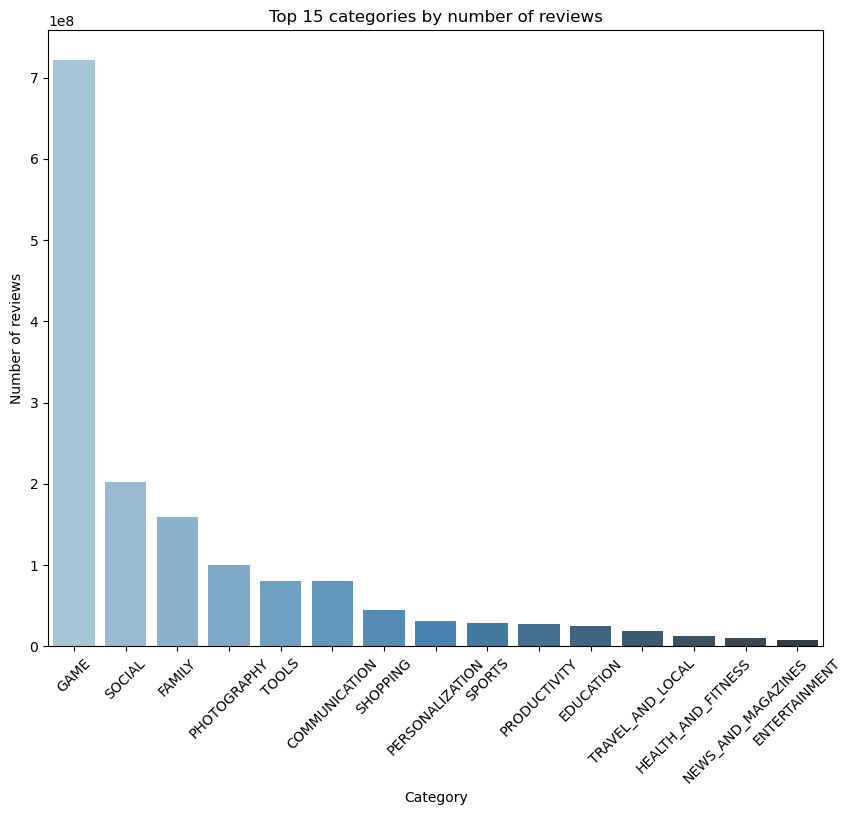

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped by 'Category' , summed by reviews
grouped_df = merged_df[['Category', 'Reviews']].groupby('Category').sum().sort_values(by='Reviews', ascending=False)

grouped_df = grouped_df.reset_index()

top_15_df = grouped_df.head(15)

plt.figure(figsize=(10, 8))

sns.barplot(x='Category', y='Reviews', data=top_15_df, palette="Blues_d")

plt.xticks(rotation=45)

plt.title("Top 15 categories by number of reviews")
plt.xlabel("Category")
plt.ylabel("Number of reviews")

plt.show()


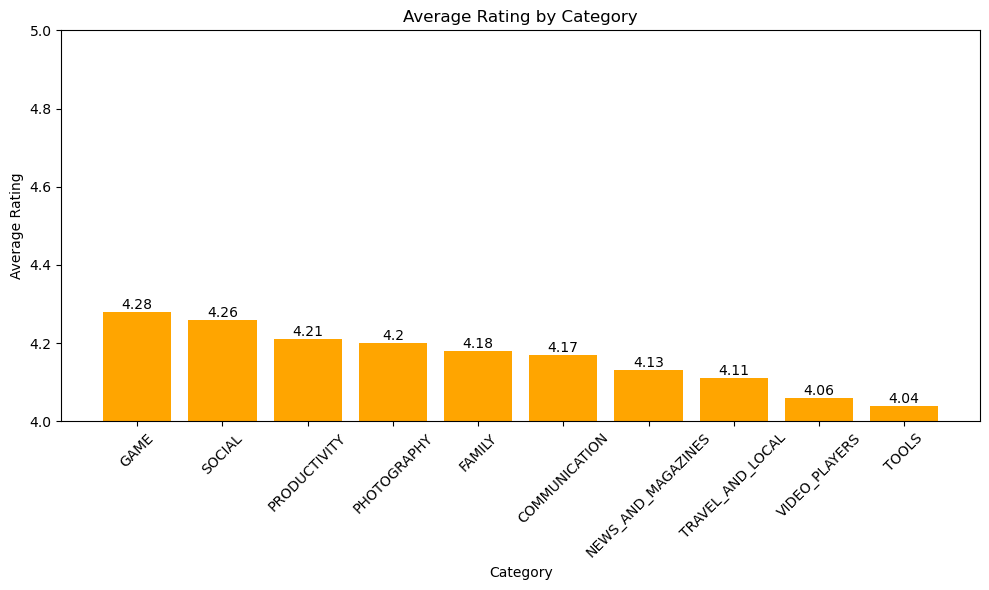

In [108]:

df = pd.read_csv('10-6-2_Category.csv') 

Category = df['Category']
avg_ratings = df['avg_rate']

plt.figure(figsize=(10, 6))
bars = plt.bar(Category, avg_ratings, color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')

plt.xticks(rotation=45) 
plt.ylim([4.0,5])
plt.tight_layout()
plt.show()


/var/folders/9j/j2dm442d3jgc5620m21l3c080000gn/T/ipykernel_10271/80758058.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['Rating'], color="blue", shade=True)


<Axes: xlabel='Rating', ylabel='Density'>

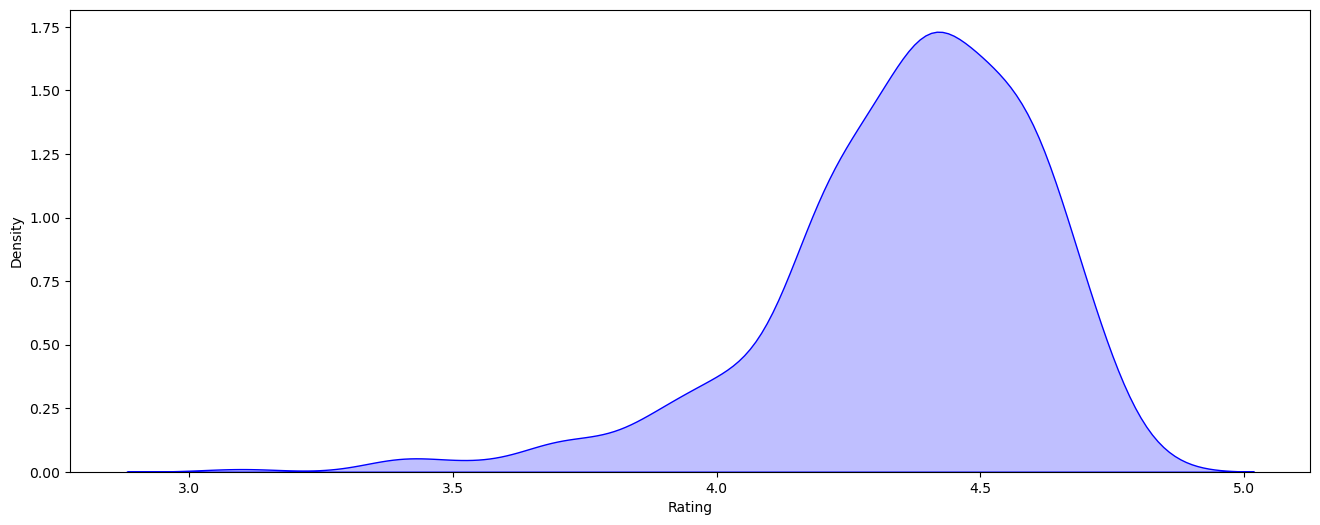

In [110]:
plt.figure(figsize=(16, 6))
sns.kdeplot(merged_df['Rating'], color="blue", shade=True)

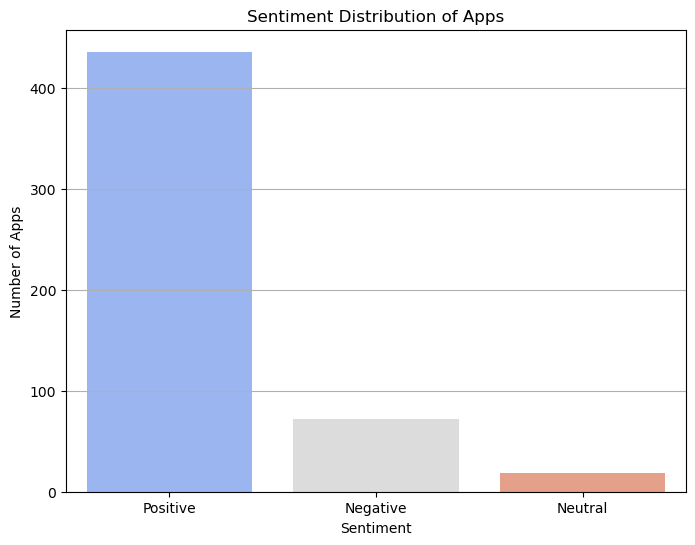

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for sentiment count
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution of Apps')
plt.xlabel('Sentiment')
plt.ylabel('Number of Apps')
plt.grid(axis='y')
plt.show()


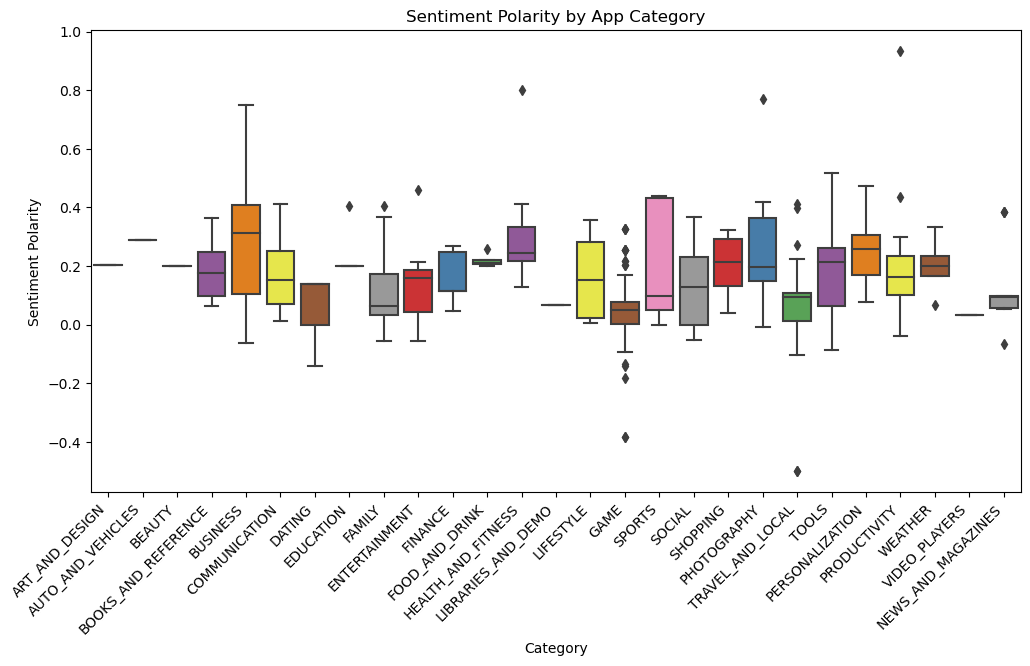

In [114]:
# Box plot for Sentiment Polarity by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Category', y='Sentiment_Polarity', palette='Set1')
plt.title('Sentiment Polarity by App Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.show()


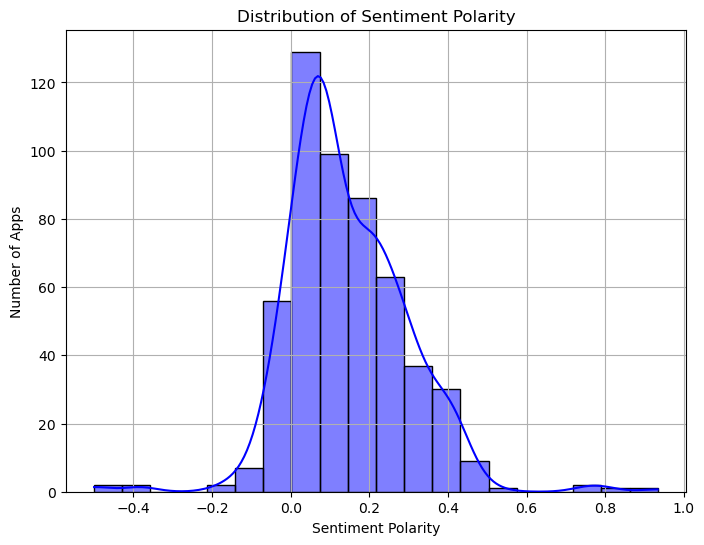

In [116]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Sentiment_Polarity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()

In [118]:
merged_df['Content Rating'].replace('Everyone 10+', '10+',inplace=True)

In [120]:
merged_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', '10+'], dtype=object)

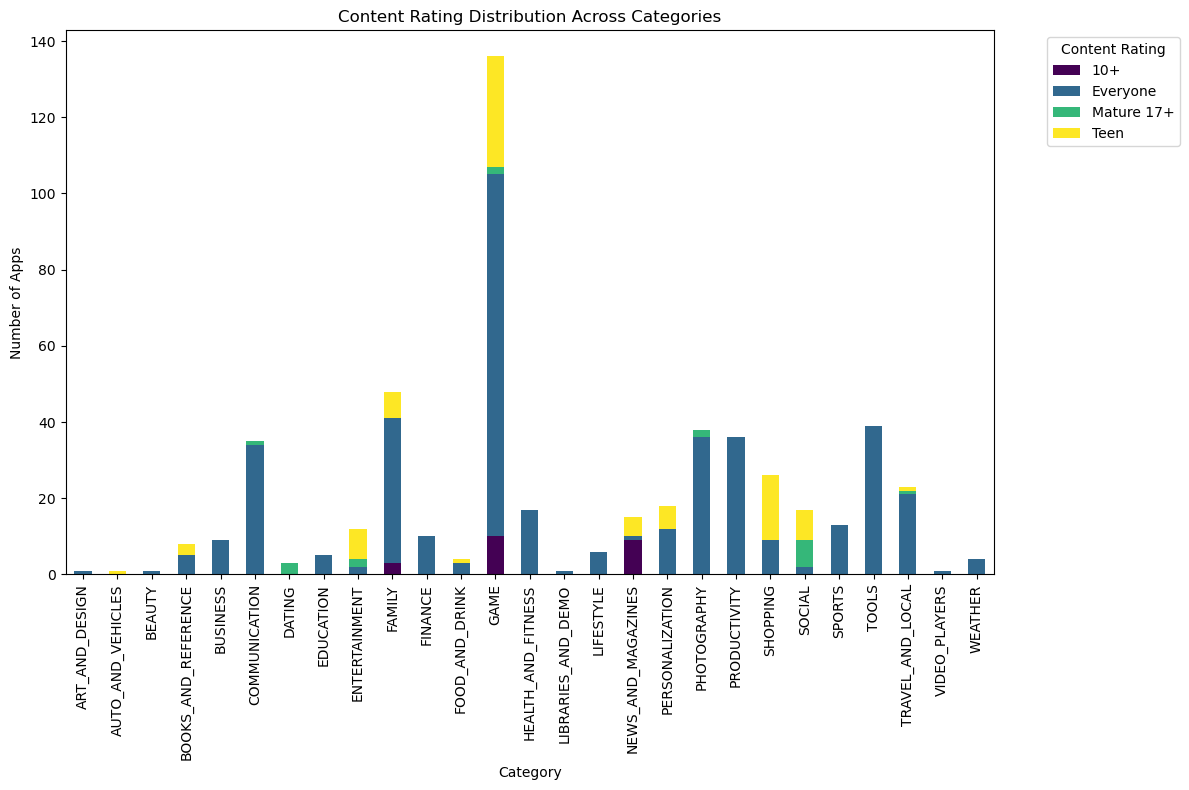

In [122]:
# Create a crosstab of Category and Content Rating
crosstab_data = pd.crosstab(merged_df['Category'], merged_df['Content Rating'])

# Plot the stacked bar plot
crosstab_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Content Rating Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.legend(title='Content Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


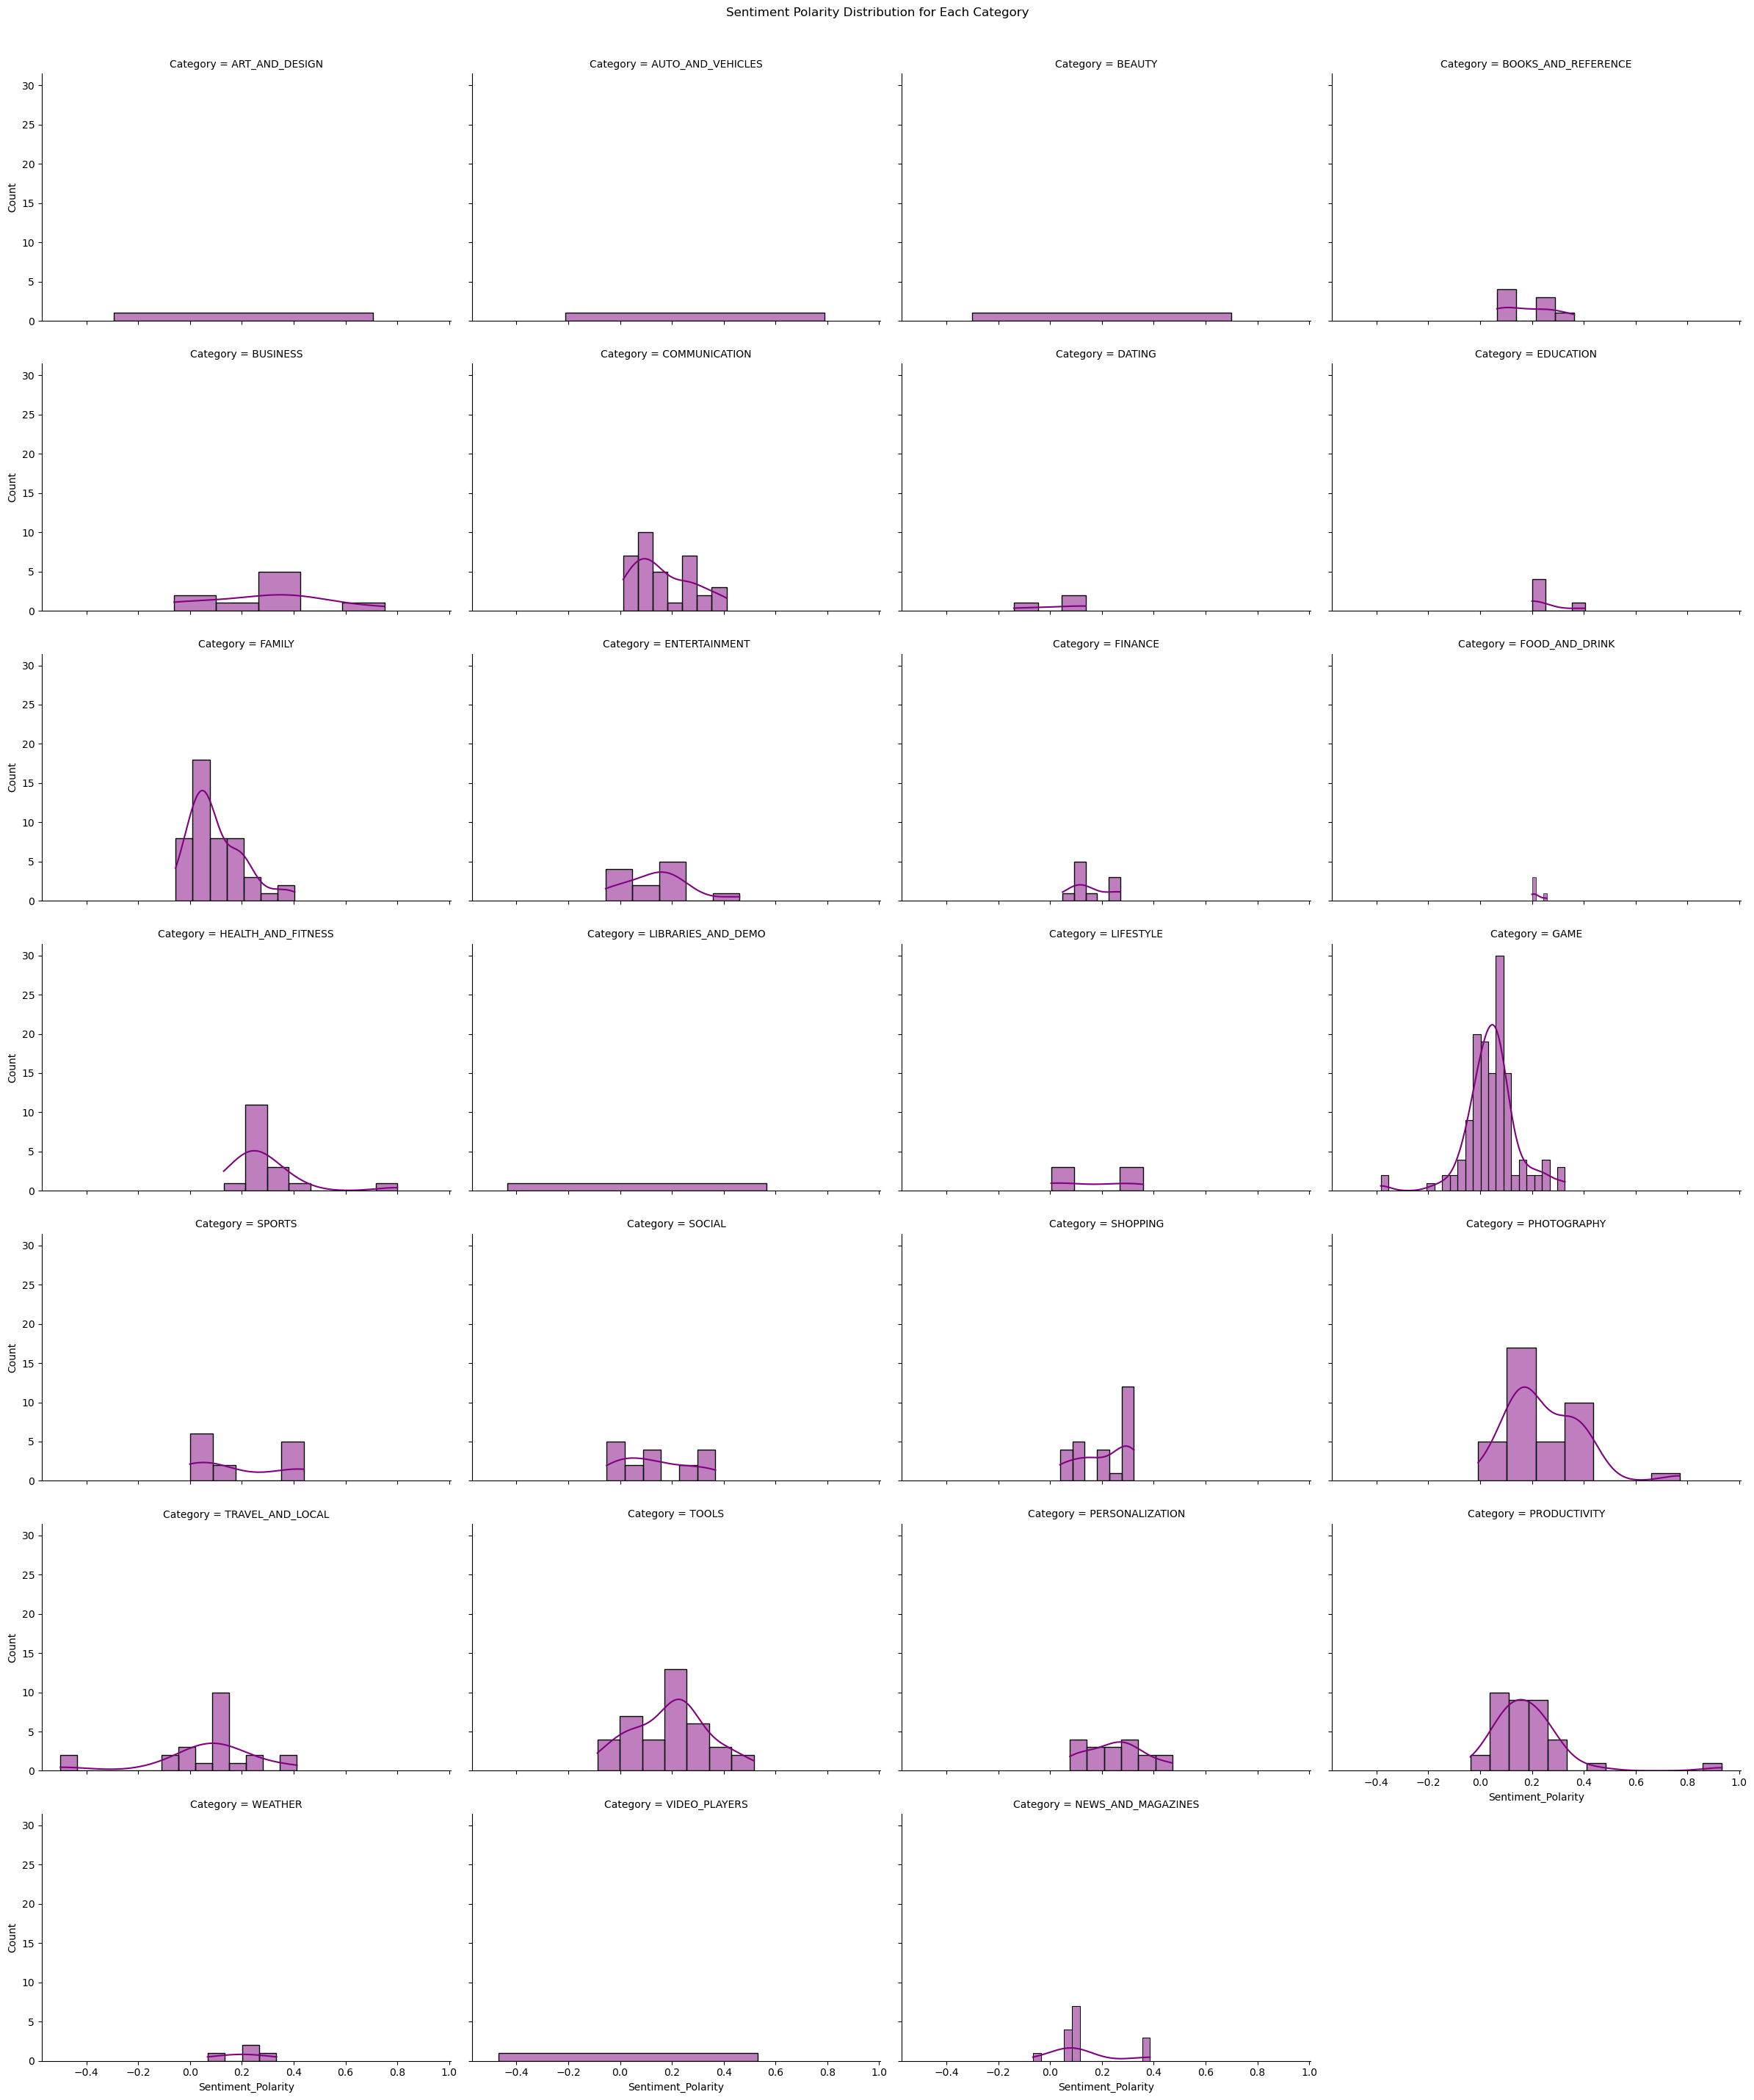

In [124]:
# Create a FacetGrid with Category as columns
g = sns.FacetGrid(merged_df, col='Category', col_wrap=4, height=4, aspect=1.5)

# Map the histplot to the grid
g.map(sns.histplot, 'Sentiment_Polarity', kde=True, color='purple')

# Adding a title to the plot
g.fig.suptitle('Sentiment Polarity Distribution for Each Category', y=1.02)

# Display the plot
plt.show()

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


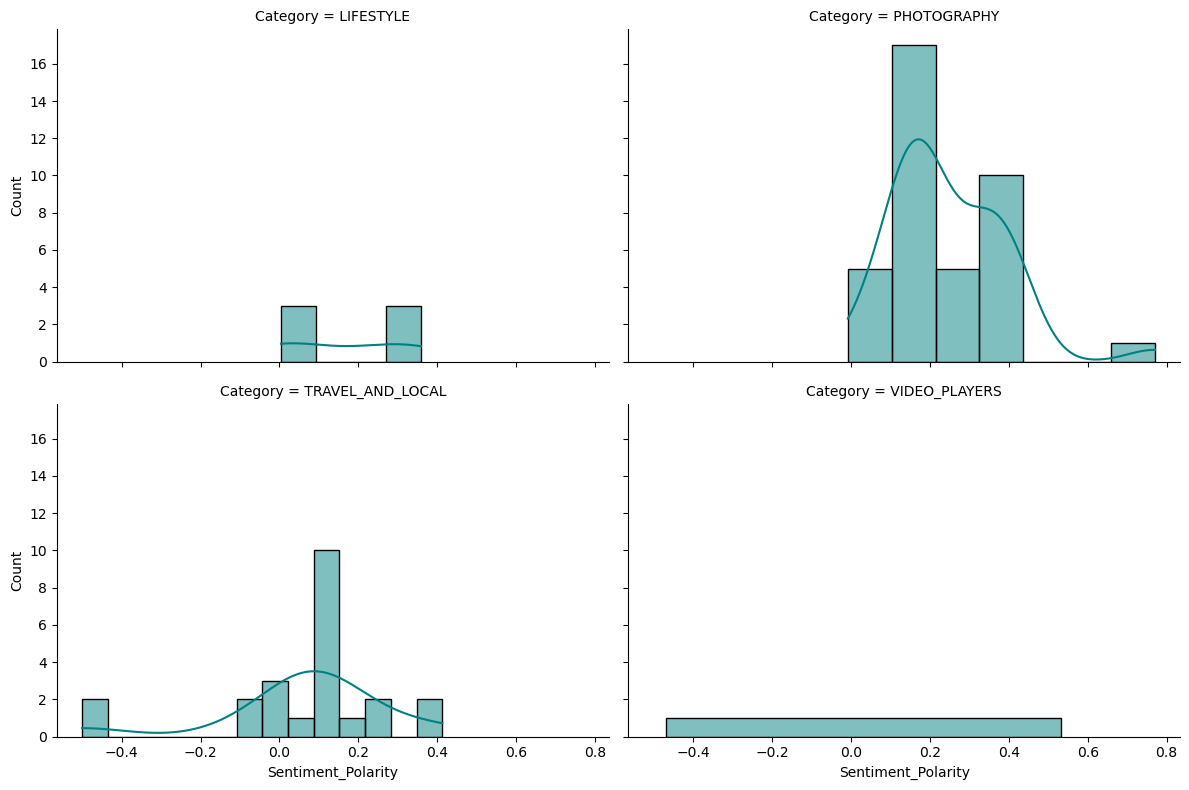

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified categories
filtered_df = merged_df[merged_df['Category'].isin(['PHOTOGRAPHY', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL', 'LIFESTYLE'])]

# Create a FacetGrid with the filtered data and Sentiment Polarity
g = sns.FacetGrid(filtered_df, col='Category', col_wrap=2, height=4, aspect=1.5)

# Map the histplot to the grid, showing Sentiment Polarity
g.map(sns.histplot, 'Sentiment_Polarity', kde=True, color='teal')

# Adding a title
